In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [11]:
df=pd.read_csv('/Users/immortal/Desktop/DataScience/internship projects/9961_14084_bundle_archive/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [14]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [15]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)

Outlet_Type
Supermarket Type1    1.291734e+07
Supermarket Type3    3.453926e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.680343e+05
Name: Item_Outlet_Sales, dtype: float64

In [16]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [7]:
df['Item_Weight'].mean()

12.857645184136183

In [17]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

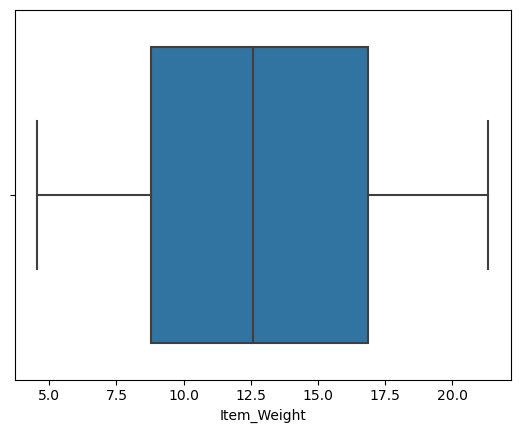

In [18]:
sns.boxplot(df['Item_Weight']) # it seems like there is no outliers in item_weight !

In [19]:
df['Item_Weight'].fillna(df['Item_Weight'].mean() , inplace =True) # fill Item_Weight withe the mean
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True) # fill Outlet_Size with the mode which is medium
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [65]:
# Which is the best item type has sales ?
df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)

Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

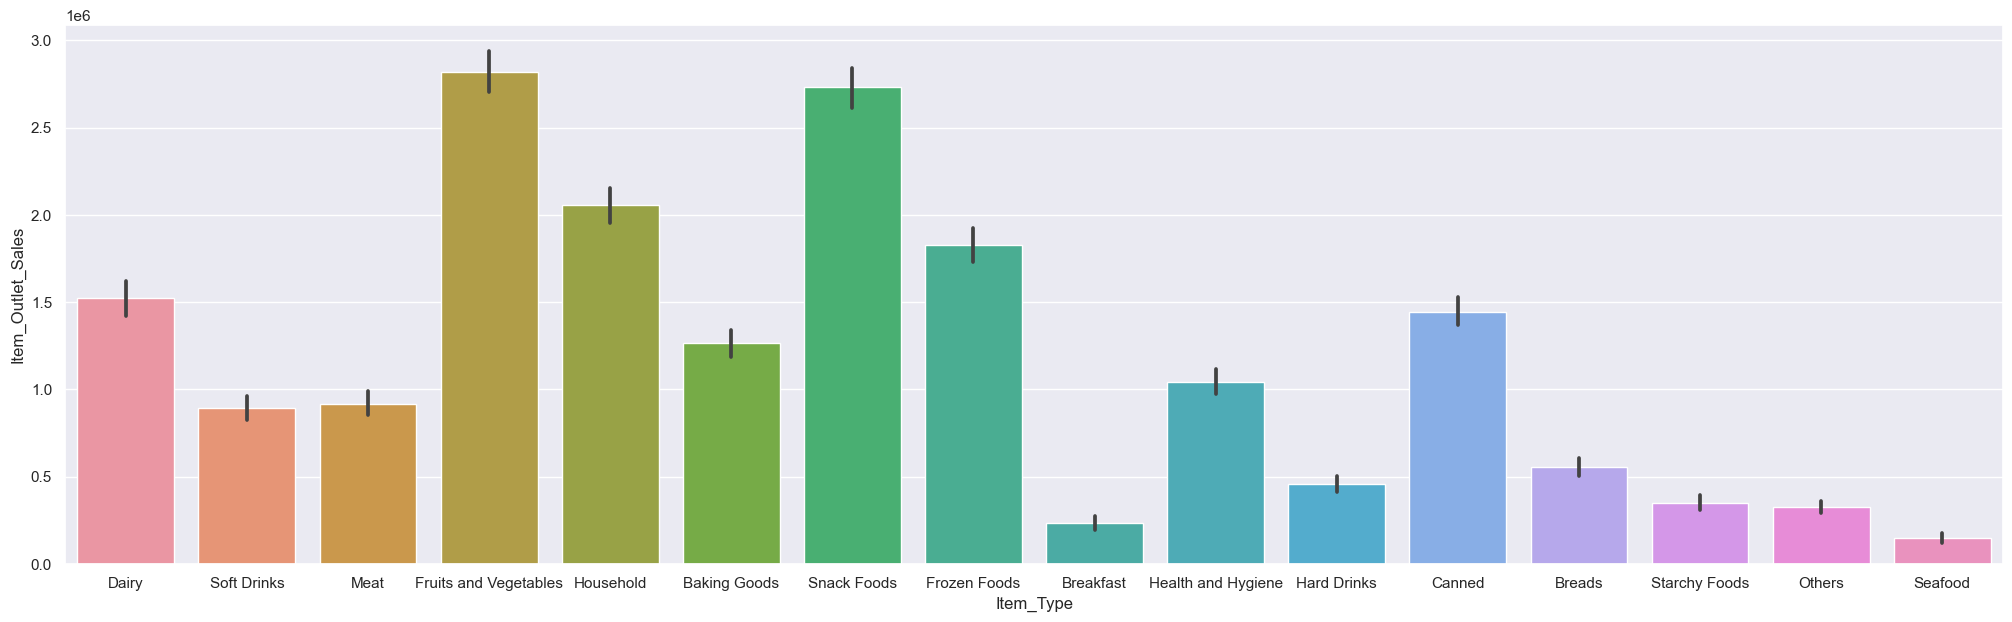

In [71]:
sns.set(rc={'figure.figsize':(25,7)})
sns.barplot(x='Item_Type' , y='Item_Outlet_Sales' , data=df ,estimator= sum)

In [72]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

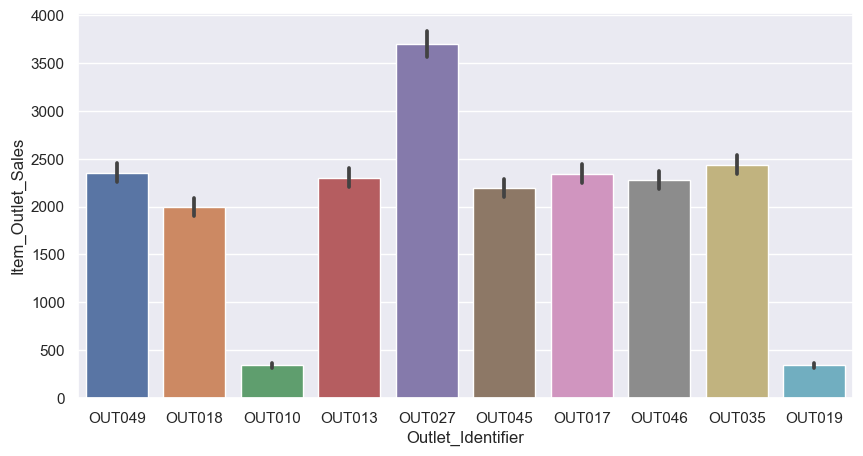

In [77]:
# Which is the best outlet_identifier that has much sales ?
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Outlet_Identifier' , y = 'Item_Outlet_Sales' , data=df)

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


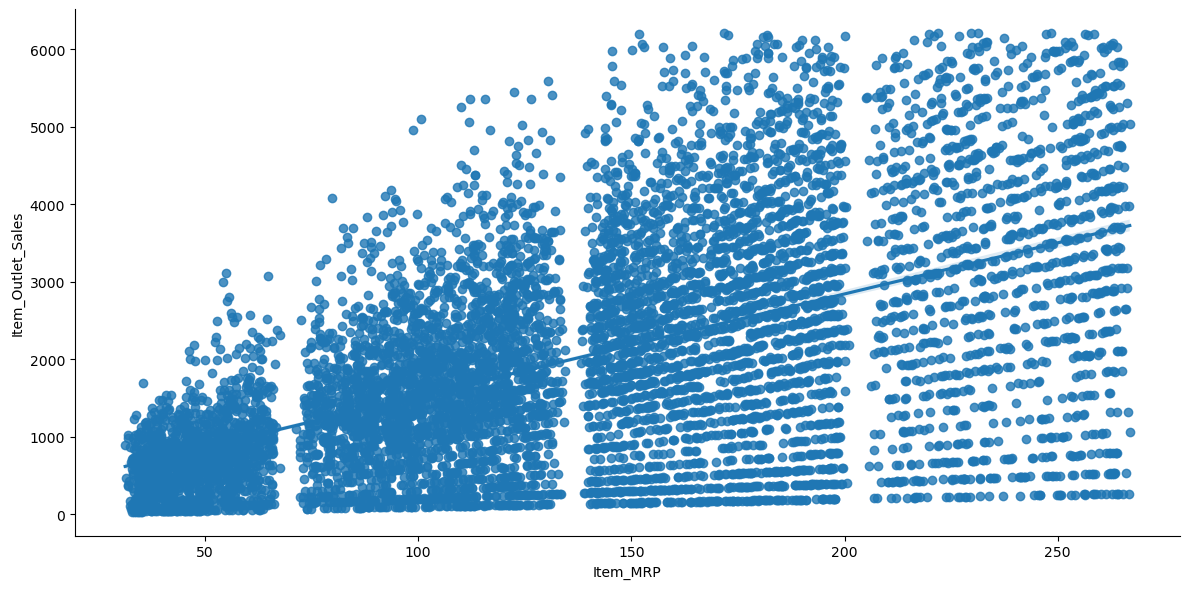

In [103]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,aspect=2,height=6)

In [22]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [23]:
size_dict={'Small' : 1 , 'Medium':2 , 'High' : 3} # make a outlet_size for training
df['Outlet_Size']=df['Outlet_Size'].map(size_dict)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052


In [24]:
df=pd.get_dummies(df , columns=['Item_Type' ,'Item_Fat_Content'], drop_first=True) # Make the categorical to numerical for Item_type and Item_fat_contnent.
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,1,0,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,1,0,0,1,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700,...,1,0,0,0,0,0,1,0,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800,...,0,0,0,0,0,0,0,1,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,3,Tier 3,Supermarket Type1,2778.3834,...,0,0,0,1,0,0,1,0,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,2,Tier 2,Supermarket Type1,549.2850,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,1,Tier 2,Supermarket Type1,1193.1136,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,2,Tier 3,Supermarket Type2,1845.5976,...,0,0,0,1,0,0,0,1,0,0


In [33]:
df=pd.get_dummies(df , columns=['Outlet_Location_Type'], drop_first=True)
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,2,Supermarket Type1,3735.1380,0,...,0,0,0,0,1,0,0,0,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,2,Supermarket Type2,443.4228,0,...,0,0,1,0,0,1,0,0,0,1
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,2,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,1998,2,Grocery Store,732.3800,0,...,0,0,0,0,0,1,0,0,0,1
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,3,Supermarket Type1,994.7052,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,3,Supermarket Type1,2778.3834,0,...,0,1,0,0,1,0,0,0,0,1
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,2,Supermarket Type1,549.2850,0,...,0,0,0,0,0,1,0,0,1,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,1,Supermarket Type1,1193.1136,0,...,0,0,0,0,1,0,0,0,1,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,2,Supermarket Type2,1845.5976,0,...,0,1,0,0,0,1,0,0,0,1


In [110]:
df=pd.get_dummies(df , columns=['Outlet_Establishment_Year' , 'Outlet_Identifier'], drop_first=True)

In [118]:
df=pd.get_dummies(df , columns=['Outlet_Type'], drop_first=True)

In [189]:
len(df.columns)

47

In [26]:
df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)

Outlet_Identifier
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT049    2.183970e+06
OUT017    2.167465e+06
OUT013    2.142664e+06
OUT046    2.118395e+06
OUT045    2.036725e+06
OUT018    1.851823e+06
OUT010    1.883402e+05
OUT019    1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

In [120]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Item_Outlet_Sales', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_

In [176]:
y=df.Item_Outlet_Sales
features_columns=['Item_MRP' ,'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009'
       ]
X = df[features_columns]

In [187]:
# The LinearRegression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_test, y_test)
print(f"The accuracy is : {r_sq}")

The accuracy is : 0.5568084481283165


In [188]:
print('The Cof :', model.coef_)

The Cof : [   13.62392951  1401.73253665  2936.44757273 -1033.45005672
  1906.31758017 -2955.18075084  1927.23928123   326.23530079
   542.06672108   533.43051478 -1266.58704937]


In [190]:
model.intercept_

-1568.971677438352

In [195]:
# Here The model will predict using linearRegresion
val_predictions = model.predict(X_test)
print(model.predict(X_test))
print(y_test)

[ 890.5361114   753.52139104 1476.46158682 ... 4857.44434988 -322.81019325
 1519.65342286]
1410     679.1160
4908     729.0510
6401    1222.4088
8265    4026.7584
386     1237.7222
          ...    
6451    4166.5764
6842    3410.2276
6829    3349.6398
1845     189.0872
6377     587.2356
Name: Item_Outlet_Sales, Length: 2487, dtype: float64


In [196]:
#The Mean absolute error
val_mae = mean_absolute_error(y_test,val_predictions)


print(val_mae)

755.1320952584462


/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

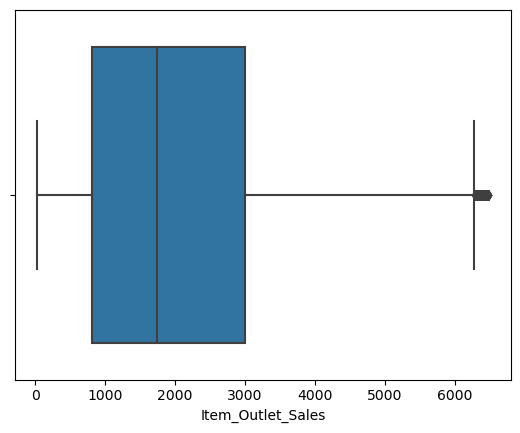

In [87]:
sns.boxplot(df['Item_Outlet_Sales']) # removing the outliers from outlet sales

In [94]:
IQR=df['Item_Outlet_Sales'].quantile(0.75)-df['Item_Outlet_Sales'].quantile(0.25)
IQR

2167.179

In [95]:
upper_limit=df['Item_Outlet_Sales'].quantile(0.75)+(1.5*IQR)
lower_limit=df['Item_Outlet_Sales'].quantile(0.25)-(1.5*IQR)
upper_limit,lower_limit

(6226.8945, -2441.8215)

In [96]:
df=df[(df['Item_Outlet_Sales']<=upper_limit)|(df['Item_Outlet_Sales']<=lower_limit)]

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

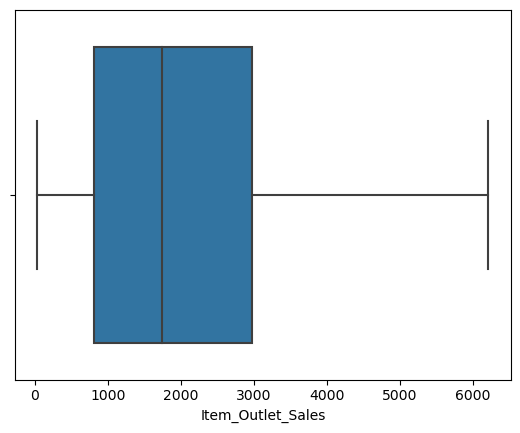

In [97]:
sns.boxplot(df['Item_Outlet_Sales'])

In [117]:
df['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8290, dtype: object